<a href="https://colab.research.google.com/github/fahadshakeel23/DataScience/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [69]:
# Load the Titanic dataset from seaborn library
import seaborn as sns
df = sns.load_dataset('titanic')

# Show the first 5 rows of the dataset
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Step 2: Understand Data Structure and Summary

In [61]:
df.shape

(891, 15)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [63]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Step 3: Handling Missing Values

In [64]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [65]:
# Fill missing age values with median age
df['age'].fillna(df['age'].median(), inplace= True)

# Fill missing deck values
df['deck'] = df['deck'].cat.add_categories('Unknown').fillna('Unknown')



# Drop rows where embark_town is missing since it's a small count
df.dropna(subset=['embark_town'], inplace=True)

# Confirm no missing values remain in these columns
df[['age', 'embark_town']].isnull().sum()



/tmp/ipython-input-2304158275.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace= True)


,0
age,0
embark_town,0


Step 4: Exploratory Visualizations

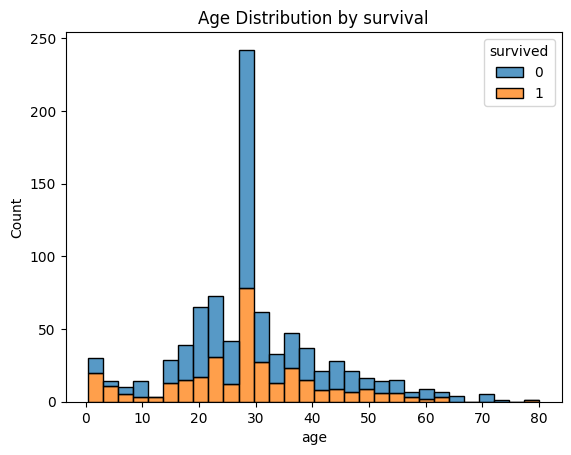

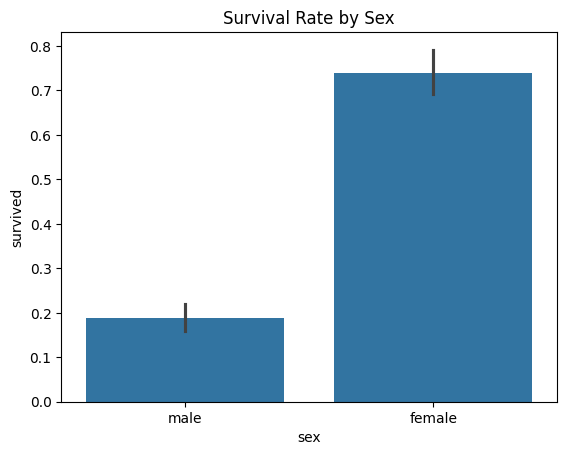

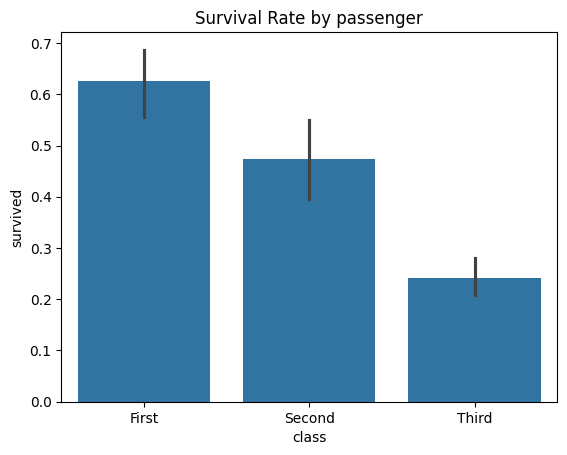

In [66]:
# Distribution of age by survival
sns.histplot(data=df, x='age', hue='survived', multiple='stack')
plt.title('Age Distribution by survival')
plt.show()

# Survival rate by sex
sns.barplot(data=df ,x='sex', y='survived')
plt.title('Survival Rate by Sex')
plt.show()


# Survival rate by passenger class
sns.barplot(data=df, x='class', y='survived')
plt.title('Survival Rate by passenger')
plt.show()




Step 5: Correlation Heatmap

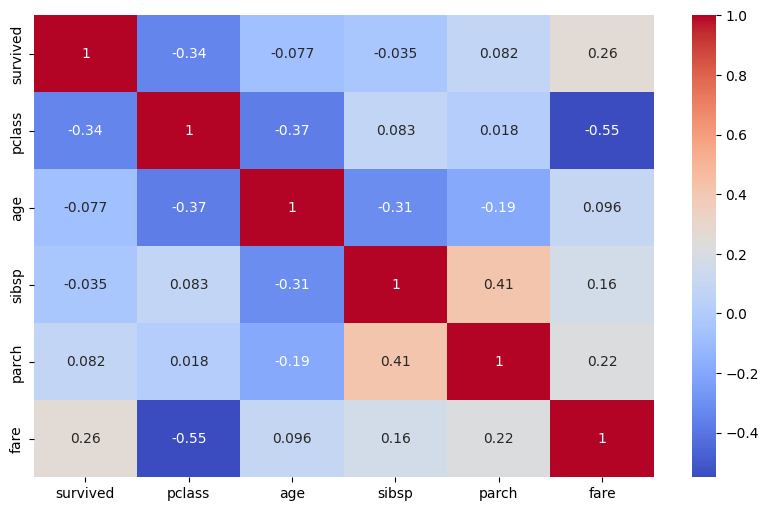

In [72]:
# Compute correlation matrix of numeric features only
corr = df.select_dtypes(include=['number']).corr()


plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

